<a href="https://colab.research.google.com/github/YUVASRI2K/Handwritten-Digit-RecognitionusingDeepLearning-Yuvasri/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading training data...
Loading testing data...
Training images shape: (60000, 784)
Training labels shape: (60000,)
Testing images shape: (10000, 784)
Testing labels shape: (10000,)


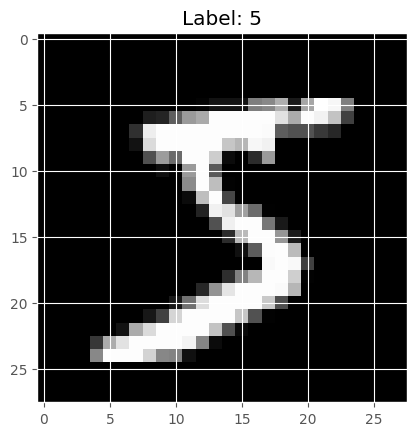

Test Accuracy: 97.05%

Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]


In [6]:
# Importing required libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import struct
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Function to load MNIST image files
def load_images(filename):
    with open(filename, 'rb') as f:
        # Read magic number, number of images, rows, and columns
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)
    return images

# Function to load MNIST label files
def load_labels(filename):
    with open(filename, 'rb') as f:
        # Read magic number and number of items
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Paths to your downloaded dataset files in Colab
train_images_path = '/content/train-images-idx3-ubyte'
train_labels_path = '/content/train-labels-idx1-ubyte'
test_images_path = '/content/t10k-images-idx3-ubyte'
test_labels_path = '/content/t10k-labels-idx1-ubyte'

# Load training and testing data
print("Loading training data...")
train_images = load_images(train_images_path)
train_labels = load_labels(train_labels_path)

print("Loading testing data...")
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)

# Check the shape of loaded data
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

# Step 6: Example - Visualizing a sample from training data
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Simple KNeighborsClassifier implementation
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(train_images, train_labels)

# Predict on the test data
test_predictions = knn.predict(test_images)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, test_predictions))
